In [1]:
import pandas as pd

In [2]:
import csv
from collections import defaultdict

disease_list = []

def return_list(disease):
    disease_list = []
    match = disease.replace('^','_').split('_')
    ctr = 1
    for group in match:
        if ctr%2==0:
            disease_list.append(group)
        ctr = ctr + 1

    return disease_list

with open("Scraped-Data/dataset_uncleaned.csv", encoding ="ISO-8859-1") as csvfile:
    reader = csv.reader(csvfile)
    disease=""
    weight = 0
    disease_list = []
    dict_wt = {}
    dict_=defaultdict(list)
    for row in reader:

        if row[0]!="\xc2\xa0" and row[0]!="":
            disease = row[0]
            disease_list = return_list(disease)
            weight = row[1]

        if row[2]!="\xc2\xa0" and row[2]!="":
            symptom_list = return_list(row[2])

            for d in disease_list:
                for s in symptom_list:
                    dict_[d].append(s)
                dict_wt[d] = weight

    #print (dict_)

Writing our cleaned data

In [3]:
with open("Scraped-Data/dataset_clean.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    for key,values in dict_.items():
        for v in values:
            #key = str.encode(key)
            key = str.encode(key).decode('utf-8')
            #.strip()
            #v = v.encode('utf-8').strip()
            #v = str.encode(v)
            writer.writerow([key,v,dict_wt[key]])

In [4]:
columns = ['Source','Target','Weight']

In [5]:
data = pd.read_csv("Scraped-Data/dataset_clean.csv",names=columns, encoding ="ISO-8859-1")

In [6]:
data.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [7]:
data.to_csv("Scraped-Data/dataset_clean.csv",index=False)

In [8]:
slist = []
dlist = []
with open("Scraped-Data/nodetable.csv","w") as csvfile:
    writer = csv.writer(csvfile)

    for key,values in dict_.items():
        for v in values:
            if v not in slist:
                writer.writerow([v,v,"symptom"])
                slist.append(v)
        if key not in dlist:
            writer.writerow([key,key,"disease"])
            dlist.append(key)

In [9]:
nt_columns = ['Id','Label','Attribute']

In [10]:
nt_data = pd.read_csv("Scraped-Data/nodetable.csv",names=nt_columns, encoding ="ISO-8859-1",)

In [11]:
nt_data.head()

,Id,Label,Attribute
0,pain chest,pain chest,symptom
1,shortness of breath,shortness of breath,symptom
2,dizziness,dizziness,symptom
3,asthenia,asthenia,symptom
4,fall,fall,symptom


In [12]:
nt_data.to_csv("Scraped-Data/nodetable.csv",index=False)

## Analysing our cleaned data

In [13]:
data = pd.read_csv("Scraped-Data/dataset_clean.csv", encoding ="ISO-8859-1")

In [14]:
data.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [15]:
len(data['Source'].unique())

149

In [16]:
len(data['Target'].unique())

405

In [17]:
df = pd.DataFrame(data)

In [18]:
df_1 = pd.get_dummies(df.Target)

In [19]:
df_1.head()

,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,abscess bacterial,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.head()

,Source,Target,Weight
0,hypertensive disease,pain chest,3363
1,hypertensive disease,shortness of breath,3363
2,hypertensive disease,dizziness,3363
3,hypertensive disease,asthenia,3363
4,hypertensive disease,fall,3363


In [21]:
df_s = df['Source']

In [22]:
df_pivoted = pd.concat([df_s,df_1], axis=1)

In [23]:
df_pivoted.drop_duplicates(keep='first',inplace=True)

In [24]:
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,hypertensive disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
len(df_pivoted)

2116

In [26]:
cols = df_pivoted.columns

In [27]:
cols = cols[1:]

In [28]:
df_pivoted = df_pivoted.groupby('Source').sum()
df_pivoted = df_pivoted.reset_index()
df_pivoted[:5]

,Source,Heberden's node,Murphy's sign,Stahli's line,abdomen acute,abdominal bloating,abdominal tenderness,abnormal sensation,abnormally hard consistency,abortion,...,vision blurred,vomiting,weepiness,weight gain,welt,wheelchair bound,wheezing,withdraw,worry,yellow sputum
0,Alzheimer's disease,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,HIV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,PneumocystisÂ cariniiÂ pneumonia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,accidentÂ cerebrovascular,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,acquiredÂ immuno-deficiency syndrome,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
len(df_pivoted)

149

In [30]:
df_pivoted.to_csv("Scraped-Data/df_pivoted.csv")

In [31]:
x = df_pivoted[cols]
y = df_pivoted['Source']

### Trying out our classifier to learn diseases from the symptoms

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [34]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [35]:
mnb.score(x_test, y_test)

0.0

In [36]:
mnb_tot = MultinomialNB()
mnb_tot = mnb_tot.fit(x, y)

In [37]:
mnb_tot.score(x, y)

0.8993288590604027

In [38]:
disease_pred = mnb_tot.predict(x)

In [39]:
disease_real = y.values

In [40]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0} Actual:{1}'.format(disease_pred[i], disease_real[i]))

Pred: HIV Actual:acquiredÂ immuno-deficiency syndrome
Pred: biliary calculus Actual:cholelithiasis
Pred: coronary arteriosclerosis Actual:coronary heart disease
Pred: depression mental Actual:depressive disorder
Pred: HIV Actual:hiv infections
Pred: carcinoma breast Actual:malignant neoplasm of breast
Pred: carcinoma of lung Actual:malignant neoplasm of lung
Pred: carcinoma prostate Actual:malignant neoplasm of prostate
Pred: carcinoma colon Actual:malignant tumor of colon
Pred: candidiasis Actual:oralcandidiasis
Pred: effusion pericardial Actual:pericardial effusion body substance
Pred: malignant neoplasms Actual:primary malignant neoplasm
Pred: sepsis (invertebrate) Actual:septicemia
Pred: sepsis (invertebrate) Actual:systemic infection
Pred: tonic-clonic epilepsy Actual:tonic-clonic seizures


### Training a decision tree

In [41]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [42]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(x,y)
print ("Acurracy: ", clf_dt.score(x,y))

DecisionTree
Acurracy:  0.8993288590604027


In [43]:
from sklearn import tree 
from sklearn.tree import export_graphviz

export_graphviz(dt, 
                out_file='DOT-files/tree.dot', 
                feature_names=cols)

In [44]:
#from IPython.display import Image
#Image(filename='tree.png')

## Analysis of the Manual data

In [45]:
input_data = pd.read_csv("Data_edited/Trainingnew.csv")

In [46]:
input_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [47]:
input_data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [48]:
len(input_data.columns)

133

In [49]:
len(input_data['prognosis'].unique())

44

41 different type of target diseases are available in the manual training dataset.

In [50]:
x = input_data[cols]
y = input_data['prognosis']

KeyError: '["Heberden\'s node", "Murphy\'s sign", "Stahli\'s line", \'abdomen acute\', \'abdominal bloating\', \'abdominal tenderness\', \'abnormal sensation\', \'abnormally hard consistency\', \'abortion\', \'abscess bacterial\', \'absences finding\', \'achalasia\', \'ache\', \'adverse effect\', \'adverse reaction\', \'agitation\', \'air fluid level\', \'alcohol binge episode\', \'alcoholic withdrawal symptoms\', \'ambidexterity\', \'angina pectoris\', \'anorexia\', \'anosmia\', \'aphagia\', \'apyrexial\', \'arthralgia\', \'ascites\', \'asterixis\', \'asthenia\', \'asymptomatic\', \'ataxia\', \'atypia\', \'aura\', \'awakening early\', \'barking cough\', \'bedridden\', \'behavior hyperactive\', \'behavior showing increased motor activity\', \'blackout\', \'blanch\', \'bleeding of vagina\', \'bowel sounds decreased\', \'bradycardia\', \'bradykinesia\', \'breakthrough pain\', \'breath sounds decreased\', \'breath-holding spell\', \'breech presentation\', \'bruit\', \'burning sensation\', \'cachexia\', \'cardiomegaly\', \'cardiovascular event\', \'cardiovascular finding\', \'catatonia\', \'catching breath\', \'charleyhorse\', \'chest discomfort\', \'chest tightness\', \'chill\', \'choke\', \'cicatrisation\', \'clammy skin\', \'claudication\', \'clonus\', \'clumsiness\', \'colic abdominal\', \'consciousness clear\', \'coordination abnormal\', \'cushingoid facies\', \'cushingoidÂ\\xa0habitus\', \'cyanosis\', \'cystic lesion\', \'debilitation\', \'decompensation\', \'decreased body weight\', \'decreased stool caliber\', \'decreased translucency\', \'diarrhea\', \'difficulty\', \'difficulty passing urine\', \'disequilibrium\', \'distended abdomen\', \'distress respiratory\', \'disturbed family\', \'dizzy spells\', \'drool\', \'drowsiness\', \'dullness\', \'dysarthria\', \'dysdiadochokinesia\', \'dysesthesia\', \'dyspareunia\', \'dyspnea\', \'dyspnea on exertion\', \'dysuria\', \'ecchymosis\', \'egophony\', \'elation\', \'emphysematous change\', \'energy increased\', \'enuresis\', \'erythema\', \'estrogen use\', \'excruciating pain\', \'exhaustion\', \'extrapyramidal sign\', \'extreme exhaustion\', \'facial paresis\', \'fall\', \'fatigability\', \'fear of falling\', \'fecaluria\', \'feces in rectum\', \'feeling hopeless\', \'feeling strange\', \'feeling suicidal\', \'feels hot/feverish\', \'fever\', \'flare\', \'flatulence\', \'floppy\', \'flushing\', \'focal seizures\', \'food intolerance\', \'formication\', \'frail\', \'fremitus\', \'frothy sputum\', \'gag\', \'gasping for breath\', \'general discomfort\', \'general unsteadiness\', \'giddy mood\', \'gravida 0\', \'gravida 10\', \'green sputum\', \'groggy\', \'guaiac positive\', \'gurgle\', \'hacking cough\', \'haemoptysis\', \'haemorrhage\', \'hallucinations auditory\', \'hallucinations visual\', \'has religious belief\', \'heartburn\', \'heavy feeling\', \'heavy legs\', \'hematochezia\', \'hematocrit decreased\', \'hematuria\', \'heme positive\', \'hemianopsia homonymous\', \'hemiplegia\', \'hemodynamically stable\', \'hepatomegaly\', \'hepatosplenomegaly\', \'hirsutism\', \'history of - blackout\', \'hoard\', \'hoarseness\', \'homelessness\', \'homicidal thoughts\', \'hot flush\', \'hunger\', \'hydropneumothorax\', \'hyperacusis\', \'hypercapnia\', \'hyperemesis\', \'hyperhidrosis disorder\', \'hyperkalemia\', \'hypersomnia\', \'hypersomnolence\', \'hypertonicity\', \'hyperventilation\', \'hypesthesia\', \'hypoalbuminemia\', \'hypocalcemia result\', \'hypokalemia\', \'hypokinesia\', \'hypometabolism\', \'hyponatremia\', \'hypoproteinemia\', \'hypotension\', \'hypothermia, natural\', \'hypotonic\', \'hypoxemia\', \'immobile\', \'impaired cognition\', \'inappropriate affect\', \'incoherent\', \'indifferent mood\', \'intermenstrual heavy bleeding\', \'intoxication\', \'irritable mood\', \'jugular venous distention\', \'labored breathing\', \'lameness\', \'large-for-dates fetus\', \'leftÂ\\xa0atrialÂ\\xa0hypertrophy\', \'lesion\', \'lightheadedness\', \'lip smacking\', \'loose associations\', \'low back pain\', \'lung nodule\', \'macerated skin\', \'macule\', \'mass in breast\', \'mass of body structure\', \'mediastinal shift\', \'mental status changes\', \'metastatic lesion\', \'milky\', \'moan\', \'monoclonal\', \'monocytosis\', \'mood depressed\', \'moody\', \'motor retardation\', \'muscle hypotonia\', \'muscle twitch\', \'myalgia\', \'mydriasis\', \'myoclonus\', \'nasal discharge present\', \'nasal flaring\', \'nausea and vomiting\', \'neck stiffness\', \'neologism\', \'nervousness\', \'night sweat\', \'nightmare\', \'no known drug allergies\', \'no status change\', \'noisy respiration\', \'non-productive cough\', \'nonsmoker\', \'numbness\', \'numbness of hand\', \'oliguria\', \'orthopnea\', \'orthostasis\', \'out of breath\', \'overweight\', \'pain\', \'pain abdominal\', \'pain back\', \'pain chest\', \'pain foot\', \'pain in lower limb\', \'pain neck\', \'painful swallowing\', \'pallor\', \'palpitation\', \'panic\', \'pansystolic murmur\', \'para 1\', \'para 2\', \'paralyse\', \'paraparesis\', \'paresis\', \'paresthesia\', \'passed stones\', \'patient non compliance\', \'pericardial friction rub\', \'phonophobia\', \'photophobia\', \'photopsia\', \'pin-point pupils\', \'pleuritic pain\', \'pneumatouria\', \'polydypsia\', \'polymyalgia\', \'poor dentition\', \'poor feeding\', \'posteriorÂ\\xa0rhinorrhea\', \'posturing\', \'presence of q wave\', \'pressure chest\', \'previous pregnancies 2\', \'primigravida\', \'prodrome\', \'productive cough\', \'projectile vomiting\', \'prostate tender\', \'prostatism\', \'proteinemia\', \'pruritus\', \'pulse absent\', \'pulsusÂ\\xa0paradoxus\', \'pustule\', \'qt interval prolonged\', \'r wave feature\', \'rale\', \'rambling speech\', \'rapid shallow breathing\', \'red blotches\', \'redness\', \'regurgitates after swallowing\', \'renal angle tenderness\', \'rest pain\', \'retch\', \'retropulsion\', \'rhd positive\', \'rhonchus\', \'rigor - temperature-associated observation\', \'rolling of eyes\', \'room spinning\', \'satiety early\', \'scar tissue\', \'sciatica\', \'scleralÂ\\xa0icterus\', \'scratch marks\', \'sedentary\', \'seizure\', \'sensory discomfort\', \'shooting pain\', \'shortness of breath\', \'side pain\', \'sinus rhythm\', \'sleeplessness\', \'sleepy\', \'slowing of urinary stream\', \'sneeze\', \'sniffle\', \'snore\', \'snuffle\', \'soft tissue swelling\', \'sore to touch\', \'spasm\', \'speech slurred\', \'splenomegaly\', \'spontaneous rupture of membranes\', \'sputum purulent\', \'st segment depression\', \'st segment elevation\', \'stiffness\', \'stinging sensation\', \'stool color yellow\', \'stridor\', \'stuffy nose\', \'stupor\', \'suicidal\', \'superimposition\', \'sweat\', \'sweating increased\', \'swelling\', \'symptom aggravating factors\', \'syncope\', \'systolic ejection murmur\', \'systolic murmur\', \'t wave inverted\', \'tachypnea\', \'tenesmus\', \'terrify\', \'thicken\', \'throat sore\', \'throbbing sensation quality\', \'tinnitus\', \'tired\', \'titubation\', \'todd paralysis\', \'tonic seizures\', \'transaminitis\', \'transsexual\', \'tremor\', \'tremor resting\', \'tumor cell invasion\', \'unable to concentrate\', \'unconscious state\', \'uncoordination\', \'underweight\', \'unhappy\', \'unresponsiveness\', \'unsteady gait\', \'unwell\', \'urge incontinence\', \'urgency ofÂ\\xa0micturition\', \'urinary hesitation\', \'urinoma\', \'verbal auditory hallucinations\', \'verbally abusive behavior\', \'vertigo\', \'vision blurred\', \'weepiness\', \'weight gain\', \'welt\', \'wheelchair bound\', \'wheezing\', \'withdraw\', \'worry\', \'yellow sputum\'] not in index'

In [51]:
test_data = pd.read_csv("Data_edited/Testingnew.csv")
test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Otezla-L40
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Kevzera-M06


In [52]:
#They are 4920 rows, 133 columns
input_data.shape

(4920, 133)

In [53]:
#seeing any null values are there with descending format
input_data.isnull().sum().sort_values(ascending=False)

itching                 0
spinning_movements      0
altered_sensorium       0
muscle_pain             0
irritability            0
                       ..
abdominal_pain          0
constipation            0
back_pain               0
pain_behind_the_eyes    0
prognosis               0
Length: 133, dtype: int64

In [54]:
#looking how much percent each diseases having
input_data['prognosis'].value_counts(normalize = True)

Fungal infection                           0.024390
Hypothyroidism-E03                         0.024390
Hepatitis E                                0.024390
Xofluza-ICD25                              0.024390
Tuberculosis                               0.024390
Common Cold                                0.024390
Pneumonia                                  0.024390
Dimorphic hemmorhoids(piles)               0.024390
Heart attack                               0.024390
Varicose veins                             0.024390
Hyperthyroidism                            0.024390
Otezla-L40                                 0.024390
Ozempic-E11                                0.024390
Osteoarthristis                            0.024390
Arthritis                                  0.024390
(vertigo) Paroymsal  Positional Vertigo    0.024390
Acne                                       0.024390
Urinary tract infection                    0.024390
Psoriasis                                  0.024390
Impetigo    

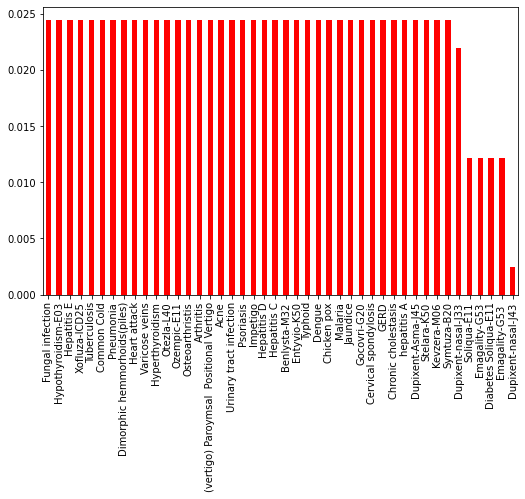

In [55]:
#as we can see each no. diseases having the same percentage through bar chart
input_data['prognosis'].value_counts(normalize = True).plot.bar(color='red')
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

<AxesSubplot:>

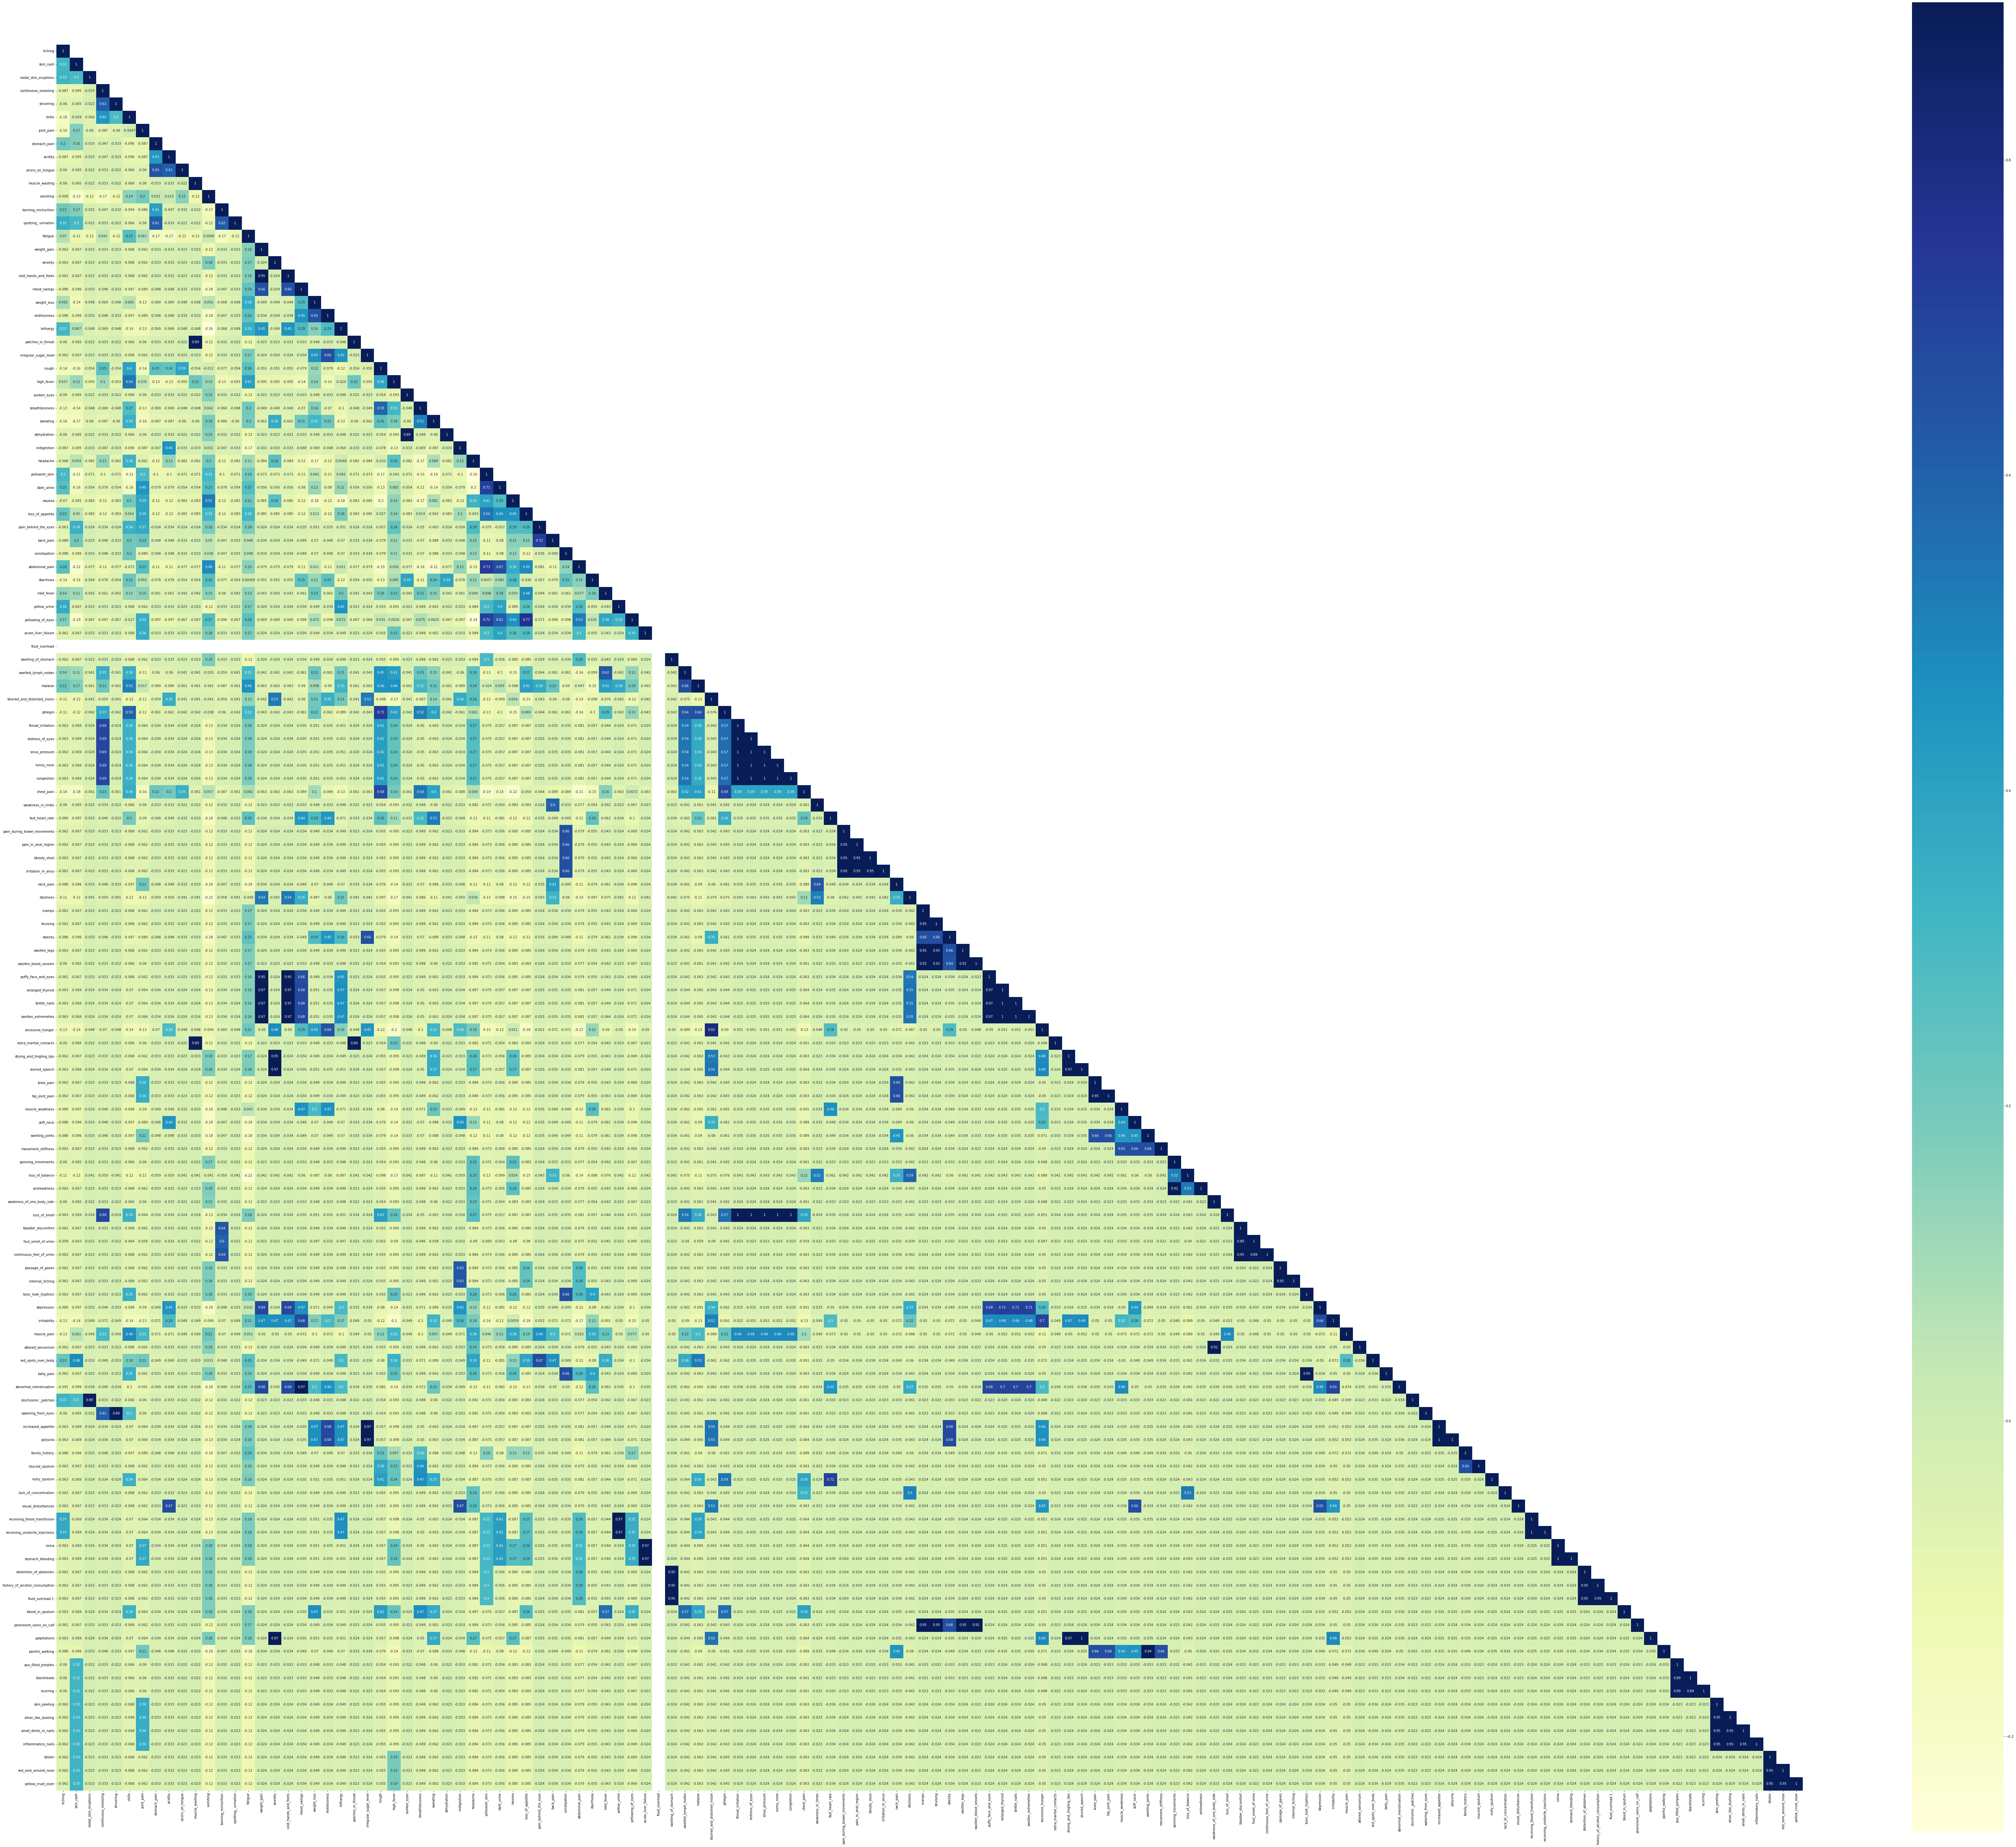

In [56]:
#checking the relationship between the variables by applying the correlation 
import numpy as np
corr = input_data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [57]:
#took two high correlation variables and analysing if it is satisfying null hypothesis or alternate hypothesis
pd.crosstab(input_data['cold_hands_and_feets'],input_data['weight_gain'])

weight_gain,0,1
cold_hands_and_feets,,
0,4800,6
1,6,108


In [58]:
#imported the chi square contingency
from scipy.stats import chi2_contingency
#as p value is  0.0  which is less than 0.05 then they are actually different from each other which satisfy the alternate hypothesis 
chi2_contingency(pd.crosstab(input_data['cold_hands_and_feets'],input_data['weight_gain']))

(4362.40173527245,
 0.0,
 1,
 array([[4.69464146e+03, 1.11358537e+02],
        [1.11358537e+02, 2.64146341e+00]]))

In [59]:
x = input_data.drop(['prognosis'],axis =1)
y = input_data['prognosis']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [61]:
#imported naive_baye algorithm
from sklearn.naive_bayes import MultinomialNB
#fitted the model
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

score = mnb.score(x_test, y_test)
print("Accuracy Score: ",score)

Accuracy Score:  0.9716748768472906


In [62]:
import pickle
pickle.dump(mnb, open('model.pkl', 'wb'))
mnb = pickle.load(open('model.pkl', 'rb'))
print(mnb)

MultinomialNB()


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(x_train, y_train)
score = gbm_clf.score(x_train, y_train)
print(score)

0.9921116504854369


In [64]:
#by cross validating we got mean also 100%
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=3)
print (scores)
print (scores.mean())

[0.97785978 0.97966728 0.97597043]
0.9778324955153432


In [65]:
scores = cross_val_score(gbm_clf, x_test, y_test, cv=10)
print (scores)
print (scores.mean())

C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


[0.98773006 1.         0.98159509 0.98773006 0.99382716 0.99382716
 0.98148148 0.99382716 0.95061728 0.99382716]
0.9864462622131335


In [66]:
real_diseases = y_test.values
y_pred = gbm_clf.predict(x_test)
#for the cross checking purpose i want to see if predicted values and actual values are same else it gives me worng prediction 
for i in range(0, 20):
    if y_pred[i] == real_diseases[i]:
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))
    else:
        print('worng prediction')
        print ('Pred: {0} Actual:{1}'.format(y_pred[i], real_diseases[i]))

Pred: Acne Actual:Acne
Pred: Acne Actual:Acne
Pred: Hyperthyroidism Actual:Hyperthyroidism
Pred: Symtuza-B20 Actual:Symtuza-B20
Pred: Chronic cholestasis Actual:Chronic cholestasis
Pred: Dupixent-nasal-J33 Actual:Dupixent-nasal-J33
Pred: Ozempic-E11 Actual:Ozempic-E11
Pred: Arthritis Actual:Arthritis
Pred: Benlysta-M32 Actual:Benlysta-M32
Pred: Emagality-G53  Actual:Emagality-G53 
Pred: Urinary tract infection Actual:Urinary tract infection
Pred: Diabetes Soliqua-E11 Actual:Diabetes Soliqua-E11
Pred: Hepatitis D Actual:Hepatitis D
Pred: Psoriasis Actual:Psoriasis
Pred: Xofluza-ICD25 Actual:Xofluza-ICD25
Pred: Xofluza-ICD25 Actual:Xofluza-ICD25
Pred: Dimorphic hemmorhoids(piles) Actual:Dimorphic hemmorhoids(piles)
Pred: Hepatitis E Actual:Hepatitis E
Pred: Soliqua-E11 Actual:Soliqua-E11
Pred: Cervical spondylosis Actual:Cervical spondylosis


In [67]:
#imported Kfold
from sklearn.model_selection import KFold

## Function to run multiple algorithms with different K values of KFold.
def evaluate(train_data,kmax,algo):
    test_scores = {}
    train_scores = {}
    for i in range(2,kmax,2):
        kf = KFold(n_splits = i)
        sum_train = 0
        sum_test = 0
        data = input_data
        for train,test in kf.split(data):
            train_data = data.iloc[train,:]
            test_data = data.iloc[test,:]
            x_train = train_data.drop(["prognosis"],axis=1)
            y_train = train_data['prognosis']
            x_test = test_data.drop(["prognosis"],axis=1)
            y_test = test_data["prognosis"]
            algo_model = algo.fit(x_train,y_train)
            sum_train += algo_model.score(x_train,y_train)
            y_pred = algo_model.predict(x_test)
            sum_test += accuracy_score(y_test,y_pred)
        average_test = sum_test/i
        average_train = sum_train/i
        test_scores[i] = average_test
        train_scores[i] = average_train
        print("kvalue: ",i)
    return(train_scores,test_scores)

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
nb = MultinomialNB()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',)
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators = 10)

In [69]:
algo_dict = {'l_o_g':log,'d_t':dt,'r_a_n':ran,'N_B' : nb, 'G_B' : gbm}
algo_train_scores={}
algo_test_scores={}

In [70]:
from sklearn.metrics import accuracy_score
max_kfold = 11
for algo_name in algo_dict.keys():
    print(algo_name)
    tr_score,tst_score = evaluate(input_data,max_kfold,algo_dict[algo_name])
    algo_train_scores[algo_name] = tr_score
    algo_test_scores[algo_name] = tst_score
print(algo_train_scores)
print(algo_test_scores)

l_o_g
kvalue:  2


C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

kvalue:  4


C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

kvalue:  6


C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

kvalue:  8


C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

kvalue:  10
d_t
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
r_a_n
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
N_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
G_B
kvalue:  2
kvalue:  4
kvalue:  6
kvalue:  8
kvalue:  10
{'l_o_g': {2: 0.9975609756097561, 4: 0.9849593495934958, 6: 0.9939024390243901, 8: 0.99390243902439, 10: 0.9939024390243902}, 'd_t': {2: 0.9975609756097561, 4: 0.9939024390243902, 6: 0.9939024390243901, 8: 0.99390243902439, 10: 0.9939024390243902}, 'r_a_n': {2: 0.9975609756097561, 4: 0.9939024390243902, 6: 0.9939024390243901, 8: 0.99390243902439, 10: 0.9939024390243902}, 'N_B': {2: 0.9975609756097561, 4: 0.98130081300813, 6: 0.9780487804878049, 8: 0.9766550522648084, 10: 0.9758807588075882}, 'G_B': {2: 0.9975609756097561, 4: 0.9939024390243902, 6: 0.9939024390243901, 8: 0.99390243902439, 10: 0.9939024390243902}}
{'l_o_g': {2: 0.948780487804878, 4: 0.9597560975609756, 6: 0.9939024390243901, 8: 0.9939024390243902, 10: 0.9939024390243902},

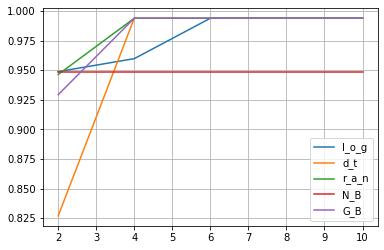

In [71]:
df_test = pd.DataFrame(algo_test_scores)
df_train = pd.DataFrame(algo_train_scores)

df_test.plot(grid = 1)
plt.show()

In [72]:
#building the model at k value 2 
test_scores={}
train_scores={}
for i in range(2,4,2):
    kf = KFold(n_splits = i)
    sum_train = 0
    sum_test = 0
    data = input_data
    for train,test in kf.split(data):
        train_data = data.iloc[train,:]
        test_data = data.iloc[test,:]
        x_train = train_data.drop(["prognosis"],axis=1)
        y_train = train_data['prognosis']
        x_test = test_data.drop(["prognosis"],axis=1)
        y_test = test_data["prognosis"]
        algo_model = gbm.fit(x_train,y_train)
        sum_train += gbm.score(x_train,y_train)
        y_pred = gbm.predict(x_test)
        sum_test += accuracy_score(y_test,y_pred)
    average_test = sum_test/i
    average_train = sum_train/i
    test_scores[i] = average_test
    train_scores[i] = average_train
    print("kvalue: ",i)

kvalue:  2


In [73]:
print(train_scores)
print(test_scores)

{2: 0.9975609756097561}
{2: 0.9292682926829268}


In [74]:
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]

In [75]:
features = input_data.columns[:-1]
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 109 - lack_of_concentration (0.115123)
2. feature 56 - chest_pain (0.068726)
3. feature 64 - dizziness (0.067698)
4. feature 33 - dark_urine (0.019690)
5. feature 36 - pain_behind_the_eyes (0.019360)


In [76]:
feature_dict = {}
for i,f in enumerate(features):
    feature_dict[f] = i

In [77]:
feature_dict['redness_of_eyes'], feature_dict['cough']

(52, 24)

In [78]:
sample_x = [i/52 if i ==52 else i/24 if i==24 else i*0 for i in range(len(features))]
len(sample_x)

132

In [79]:
sample_x = np.array(sample_x).reshape(1,len(sample_x))
gbm.predict(sample_x)

C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array(['Common Cold'], dtype=object)

In [80]:
gbm.predict_proba(sample_x)

C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([[0.02323789, 0.02388557, 0.01876826, 0.01007904, 0.01915836,
        0.02471219, 0.06841674, 0.2181729 , 0.01043353, 0.0206993 ,
        0.02006001, 0.01156315, 0.00184958, 0.01681618, 0.01740194,
        0.02478264, 0.01859754, 0.02340486, 0.0262806 , 0.01807478,
        0.02532302, 0.00917977, 0.0176597 , 0.01616522, 0.02105006,
        0.01303634, 0.02147824, 0.01773008, 0.01697707, 0.02471037,
        0.01195316, 0.01617895, 0.01647089, 0.01741835, 0.0250686 ,
        0.02388557, 0.00917937, 0.01751829, 0.02218555, 0.01867541,
        0.01258174, 0.00917919]])

In [81]:
gbm.__getstate__()

{'n_estimators': 100,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'criterion': 'friedman_mse',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'subsample': 1.0,
 'max_features': None,
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'init': None,
 'random_state': None,
 'alpha': 0.9,
 'verbose': 0,
 'max_leaf_nodes': None,
 'warm_start': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': None,
 'tol': 0.0001,
 'feature_names_in_': array(['itching', 'skin_rash', 'nodal_skin_eruptions',
        'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
        'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
        'vomiting', 'burning_micturition', 'spotting_ urination',
        'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
        'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
        'patches_in_throat', 'irregular_sugar_level', 'cough',
        'high_fever', 'sunken_eyes', 'breat

In [82]:
symptoms = x.columns

In [83]:
import re
regex = re.compile('_')

In [84]:
symptoms = [i if regex.search(i) == None else i.replace('_', ' ') for i in symptoms ]

In [85]:
# Function to find all close matches of  
# input string in given list of possible strings 
from difflib import get_close_matches  
def closeMatches(patterns, word): 
    print(get_close_matches(word, patterns, n=2, cutoff=0.7))

In [86]:
word = 'sivering'
closeMatches(symptoms, word)

['shivering']


In [87]:
from flashtext import KeywordProcessor
symptoms = [i if regex.search(i) == None else i.replace('_', ' ') for i in symptoms ]
keyword_processor = KeywordProcessor()
keyword_processor.add_keywords_from_list(symptoms)

In [88]:
pip install flashtext

Note: you may need to restart the kernel to use updated packages.


In [89]:
text = 'I have ITCHING, joint pain and fatigue'
keyword_processor.extract_keywords(text)

['itching', 'joint pain', 'fatigue']

In [90]:
def predict_disease(query):
    matched_keyword = keyword_processor.extract_keywords(query)
    if len(matched_keyword) == 0:
        print("No Matches")
    else:
        regex = re.compile(' ')
        processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in matched_keyword]
        print(processed_keywords)
        coded_features = []
        for keyword in processed_keywords:
            coded_features.append(feature_dict[keyword])
        #print(coded_features)
        sample_x = []
        for i in range(len(features)):
            try:
                sample_x.append(i/coded_features[coded_features.index(i)])
            except:
                sample_x.append(i*0)
        sample_x = np.array(sample_x).reshape(1,len(sample_x))
        print('Predicted Disease: ',gbm.predict(sample_x)[0])
        

In [91]:
query = 'I have a MUSCLE Wasting  of and so i dont know what can i do i  need suggesstion doctor'

In [92]:
predict_disease(query)

['muscle_wasting']
Predicted Disease:  Symtuza-B20


C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [93]:
query = 'I have a brittle nails problem came monthly once , what can i do , i dont know what is the problem.... '
predict_disease(query)

['brittle_nails']
Predicted Disease:  Hypothyroidism-E03


C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [94]:
symptoms[:100]

['itching',
 'skin rash',
 'nodal skin eruptions',
 'continuous sneezing',
 'shivering',
 'chills',
 'joint pain',
 'stomach pain',
 'acidity',
 'ulcers on tongue',
 'muscle wasting',
 'vomiting',
 'burning micturition',
 'spotting  urination',
 'fatigue',
 'weight gain',
 'anxiety',
 'cold hands and feets',
 'mood swings',
 'weight loss',
 'restlessness',
 'lethargy',
 'patches in throat',
 'irregular sugar level',
 'cough',
 'high fever',
 'sunken eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish skin',
 'dark urine',
 'nausea',
 'loss of appetite',
 'pain behind the eyes',
 'back pain',
 'constipation',
 'abdominal pain',
 'diarrhoea',
 'mild fever',
 'yellow urine',
 'yellowing of eyes',
 'acute liver failure',
 'fluid overload',
 'swelling of stomach',
 'swelled lymph nodes',
 'malaise',
 'blurred and distorted vision',
 'phlegm',
 'throat irritation',
 'redness of eyes',
 'sinus pressure',
 'runny nose',
 'congestion',
 'chest pain',


In [95]:
import pickle
pickle.dump(gbm_clf, open('E:/Pred_sym/gbm.pkl', 'wb'))
gbm_clf = pickle.load(open('gbm.pkl', 'rb'))
print(gbm)

GradientBoostingClassifier()


In [96]:
import pickle 
with open("mod.pkl", "wb") as file:
    pickle.dump(gbm, file=file)

In [97]:
import pickle
import json
#query = []
def predict_disease(query):
    matched_keyword = keyword_processor.extract_keywords(query)
   # model = GradientBoostingClassifier()
    gbm = pickle.load(open("E:/Pred_sym/gbm.pkl", "rb"))
    if len(matched_keyword) == 0:
        print("No Matches")
    else:
        regex = re.compile(' ')
        processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in matched_keyword]
        print(processed_keywords)
        coded_features = []
        for keyword in processed_keywords:
            coded_features.append(feature_dict[keyword])
        #print(coded_features)
        sample_x = []
        for i in range(len(features)):
            try:
                sample_x.append(i/coded_features[coded_features.index(i)])
            except:
                sample_x.append(i*0)
        sample_x = np.array(sample_x).reshape(1,len(sample_x))
        #sample_x = model.predict([query])
        print('Predicted Disease: ',gbm.predict(sample_x)[0])
        json_obj = json.dumps(gbm.predict(sample_x)[0], indent=4)
        return json_obj

In [98]:
query = 'i have a have a scurring'
predict_disease(query)

['scurring']
Predicted Disease:  Acne


C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


'"Acne"'

In [99]:
import pickle
import json
#query = []
def predict_disease(query):
    #query = []
    matched_keyword = keyword_processor.extract_keywords(query)
   # model = GradientBoostingClassifier()
    gbm = pickle.load(open("E:/Pred_sym/gbm.pkl", "rb"))
    if len(matched_keyword) == 0:
        print("No Matches")
    else:
        regex = re.compile(' ')
        processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in matched_keyword]
        print(processed_keywords)
        coded_features = []
        for keyword in processed_keywords:
            coded_features.append(feature_dict[keyword])
        #print(coded_features)
        sample_x = []
        for i in range(len(features)):
            try:
                sample_x.append(i/coded_features[coded_features.index(i)])
            except:
                sample_x.append(i*0)
        sample_x = np.array(sample_x).reshape(1,len(sample_x))
        #sample_x = model.predict([query])
        print('Predicted Disease: ',gbm.predict(sample_x)[0])
        json_obj = json.dumps(gbm.predict(sample_x)[0], indent=4)
        return json_obj

In [100]:
query = 'have a scurring'

In [101]:
predict_disease(query)

['scurring']
Predicted Disease:  Acne


C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


'"Acne"'

In [102]:
#@app.route('/predict',methods=['GET','POST'])
def predict():
    main_data = request.get_json()
    query = main_data['query']
    data = float(query)
    data = extract_keywords(data)
    print(data)
    #data = word_tokenize(data)
    #len_of_sent = spam_identifier(data)
    #if len_of_sent > threshold_sent:
    #lemmer = WordNetLemmatizer()
      #  data = " ".join([lemmer.lemmatize(i.lower()) for i in data if not i in icliniq_stopwords_v2])
    pred = gbm.predict([data])
        #pred0 = icliniqML.predict_proba([data])
        #for label in pred:
    #        output = ad_segregator(data,label,edgecase_ads)
    #else:
   #     output = ""
    print(output)
    return output

In [103]:
pred = 'i have a scurring'

In [104]:
predict_disease(pred)

['scurring']
Predicted Disease:  Acne


C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


'"Acne"'

In [105]:
import re
import uuid
import nltk
import pickle
import requests
import subprocess
import numpy as np
import pandas as pd
from flask import Flask,url_for,request,jsonify
from nltk.tokenize import sent_tokenize, word_tokenize
#from preprocessing_pipeline import text_cleaner
#from config import icliniq_stopwords
from flashtext import KeywordProcessor
#import spam_identifier
#from predict_symptom import predict_disease
from nltk.stem import PorterStemmer,SnowballStemmer,WordNetLemmatizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from flask import Flask, request, redirect, url_for,send_from_directory
from werkzeug.utils import secure_filename
#from responsetime import MSKCC_Analyzer,MSKCC_Analyzer_v2
#from dataloader import summary_time_calculator
#from dataloader import column_checker
#from dataloader import dataloader_from_S3
#from datapipeline import my_dic_ad
from flashtext import KeywordProcessor
gbm = pickle.load(open("E:/Pred_sym/gbm.pkl", "rb"))

#---------- Create Flask Instance-------------#
app = Flask(__name__)
@app.route('/',methods=['GET','POST'])
def hello():
    return 'iCliniq Advertisement API and iCliniq smartAPI !!'

'''@app.route('/predict',methods=['GET','POST'])
def predict():
    main_data = request.get_json()
    message = main_data['message']
    data = str(message)
    pred = model.predict([data])
    print(pred)
    return pred
    
    #output = ""
    #print(output)
    #return float(output) '''
#@app.route('/predict',methods=['GET','POST'])
'''def predict_disease(query):
    #query = []
    matched_keyword = keyword_processor.extract_keywords(query)
   # model = GradientBoostingClassifier()
    gbm = pickle.load(open("/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/gbm.pkl", "rb"))
    if len(matched_keyword) == 0:
        print("No Matches")
    else:
        regex = re.compile(' ')
        processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in matched_keyword]
        print(processed_keywords)
        coded_features = []
        for keyword in processed_keywords:
            coded_features.append(feature_dict[keyword])
        #print(coded_features)
        sample_x = []
        for i in range(len(features)):
            try:
                sample_x.append(i/coded_features[coded_features.index(i)])
            except:
                sample_x.append(i*0)
        sample_x = np.array(sample_x).reshape(1,len(sample_x))
        #sample_x = model.predict([query])
        print('Predicted Disease: ',gbm.predict(sample_x)[0])
        json_obj = json.dumps(gbm.predict(sample_x)[0], indent=4)
        return json_obj'''
@app.route('/predict',methods=['GET','POST'])
def predict():
    main_data = request.get_json()
    query = main_data['query']
    #predict_disease(query)
    matched_keyword = keyword_processor.extract_keywords(query)
    #data = str(matched_keyword)
    if len(matched_keyword) == 0:
        print("No Matches")
    else:
        regex = re.compile(' ')
        #print(data)
        processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in matched_keyword]
        #print(processed_keywords)
        coded_features = []
        for keyword in processed_keywords:
            coded_features.append(feature_dict[keyword])
            print(coded_features)
        sample_x = []
        for i in range(len(features)):
            try:
                sample_x.append(i/coded_features[coded_features.index(i)])
            except:
                sample_x.append(i*0)
        sample_x = np.array(sample_x).reshape(1,len(sample_x))
        print('Predicted Disease: ',gbm.predict(sample_x)[0])
        json_obj = json.dumps(gbm.predict(sample_x)[0], indent=4)
        #output = gbm.predict(sample_x[0])
        #predict_disease0 = mod.predict_proba([sample_x][0])

            #pred0 = icliniqML.predict_proba([data])
        #for label in pred:
       # predict_disease0 = np.array(predict_disease).reshape(1,len(predict_disease))
        #output = ""
        #print(output)
        #print(sample_x)
        return json_obj
if __name__ == '__main__':
    app.run(host='0.0.0.0',debug=False, port = 4675)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.0.147:4675/ (Press CTRL+C to quit)
C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
192.168.0.147 - - [15/Jun/2022 23:00:13] "POST /predict HTTP/1.1" 200 -


[87]
Predicted Disease:  Gocovri-G20


In [166]:
pred = "i have a blood in scurring"

In [168]:
predict_disease(pred)

['scurring']
Predicted Disease:  Acne


C:\Users\Thirumalai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Working good but need to add model file

In [ ]:
import re
import uuid
import nltk
import pickle
import requests
import subprocess
import numpy as np
import pandas as pd
from flask import Flask,url_for,request,jsonify
from nltk.tokenize import sent_tokenize, word_tokenize
from preprocessing_pipeline import text_cleaner
from config import icliniq_stopwords
#from config import passcode, threshold_sent
import spam_identifier
from predict_symptom import predict_disease
from nltk.stem import PorterStemmer,SnowballStemmer,WordNetLemmatizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from flask import Flask, request, redirect, url_for,send_from_directory
from werkzeug.utils import secure_filename
#from responsetime import MSKCC_Analyzer,MSKCC_Analyzer_v2
#from dataloader import summary_time_calculator
#from dataloader import column_checker
#from dataloader import dataloader_from_S3
#from datapipeline import my_dic_ad
from flashtext import KeywordProcessor

#---------- Create Flask Instance-------------#
app = Flask(__name__)
#app.config['SECRET_KEY'] = passcode
#---------- Load the Trained Model -----------#
model =   GradientBoostingClassifier()
#model =pickle.load(open("/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/gbm.pkl","rb"))
loaded_model = open("/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/gbm.pkl","rb")
@app.route('/',methods=['GET','POST'])
def hello():
    return 'iCliniq Advertisement API and iCliniq smartAPI !!'

'''@app.route('/predict',methods=['GET','POST'])
def predict():
    main_data = request.get_json()
    message = main_data['message']
    data = str(message)
    pred = model.predict([data])
    print(pred)
    return pred
    
    #output = ""
    #print(output)
    #return float(output) '''
@app.route('/predict',methods=['GET','POST'])
def predict():
    main_data = request.get_json()
    message = main_data['message']
    data = str(message)
    data = text_cleaner(data)
    data = word_tokenize(data)
    #len_of_sent = spam_identifier(data)
    #if len_of_sent > threshold_sent:
    lemmer = WordNetLemmatizer()
    data = " ".join([lemmer.lemmatize(i.lower()) for i in data if not i in icliniq_stopwords])
    #output = loaded_model.predict([data])

        #pred0 = icliniqML.predict_proba([data])
        #for label in pred:
            #output = ad_segregator(data,label,edgecase_ads)
    #output = ""
    print(data)
    return data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
@app.route('/extract_keywords',methods=['GET','POST'])
def keyword_extraction():
    main_data = request.get_json()
    message = main_data['message']
    text = str(message)
    keywords = keyword_extractor(text)
    json_output = {"keywords":keywords}
    extracted_keywords = jsonify(json_output)
    return extracted_keywords
if __name__ == '__main__':
    app.run(host='0.0.0.0',debug=False, port = 4666)

In [ ]:
import re
import uuid
import nltk
import pickle
import requests
import subprocess
import numpy as np
import pandas as pd
from flask import Flask,url_for,request,jsonify
from nltk.tokenize import sent_tokenize, word_tokenize
#from preprocessing_pipeline import text_cleaner
#from config import icliniq_stopwords
#from config import passcode, threshold_sent
#import spam_identifier
#from predict_symptom import predict_disease
from nltk.stem import PorterStemmer,SnowballStemmer,WordNetLemmatizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from flask import Flask, request, redirect, url_for,send_from_directory
from werkzeug.utils import secure_filename
#from responsetime import MSKCC_Analyzer,MSKCC_Analyzer_v2
#from dataloader import summary_time_calculator
#from dataloader import column_checker
#from dataloader import dataloader_from_S3
#from datapipeline import my_dic_ad
from flashtext import KeywordProcessor

#---------- Create Flask Instance-------------#
app = Flask(__name__)
#app.config['SECRET_KEY'] = passcode
#---------- Load the Trained Model -----------#
model =   GradientBoostingClassifier()
#model =pickle.load(open("/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/gbm.pkl","rb"))
loaded_model = open("E:/Pred_sym/gbm.pkl","rb")
@app.route('/',methods=['GET','POST'])
def hello():
    return 'iCliniq Advertisement API and iCliniq smartAPI !!'

'''@app.route('/predict',methods=['GET','POST'])
def predict():
    main_data = request.get_json()
    message = main_data['message']
    data = str(message)
    pred = model.predict([data])
    print(pred)
    return pred
    
    #output = ""
    #print(output)
    #return float(output) '''
#@app.route('/predict_disease',methods=['GET','POST'])
from flashtext import KeywordProcessor
symptoms = [i if regex.search(i) == None else i.replace('_', ' ') for i in symptoms ]
keyword_processor = KeywordProcessor()
keyword_processor.add_keywords_from_list(symptoms)
#@app.route('/predict_disease',methods=['GET','POST'])


def predict_disease(query):
    matched_keyword = keyword_processor.extract_keywords(query)
   # model = GradientBoostingClassifier()
    gbm = pickle.load(open("E:/Pred_sym/gbm.pkl", "rb"))
    if len(matched_keyword) == 0:
        print("No Matches")
    else:
        regex = re.compile(' ')
        processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in matched_keyword]
        print(processed_keywords)
        coded_features = []
        for keyword in processed_keywords:
            coded_features.append(feature_dict[keyword])
        #print(coded_features)
        sample_x = []
        for i in range(len(features)):
            try:
                sample_x.append(i/coded_features[coded_features.index(i)])
            except:
                sample_x.append(i*0)
        sample_x = np.array(sample_x).reshape(1,len(sample_x))
        #sample_x = model.predict([query])
        print('Predicted Disease: ',gbm.predict(sample_x)[0])
        json_obj = json.dumps(gbm.predict(sample_x)[0], indent=4)
        return json_obj 
@app.route('/predict',methods=['GET','POST'])
def predict():
    
    main_data = request.get_json()
    query = main_data['query']
    matched_keyword = keyword_processor.extract_keywords(query)
    regex = re.compile(' ')
    processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in matched_keyword]
    print(processed_keywords)
    coded_features = []
    #data = str(query)
    #data = predict_disease(matched_keyword)
    #processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in data]
    #data = processed_keywords(data)
    #data = coded_features[data]
    sample_x = []
    for i in range(len(features)):
        try:
            sample_x.append(i/coded_features[coded_features.index(i)])
        except:
            sample_x.append(i*0)
    data = np.array(sample_x).reshape(1,len(sample_x))
    data = predict_disease(sample_x[0])
    #data = np.array(data).reshape(1,len(data))
    #data = word_tokenize(data)
    #len_of_sent = spam_identifier(data)
    #if len_of_sent > threshold_sent:
    #lemmer = WordNetLemmatizer()
    #data = " ".join([lemmer.lemmatize(i.lower()) for i in data if not i in icliniq_stopwords])
    output = loaded_model.predict([data])

        #pred0 = icliniqML.predict_proba([data])
        #for label in pred:
            #output = ad_segregator(data,label,edgecase_ads)
    #output = ""
    print(output)
    return output 
    
    #output = ""
    #print(output)
    #return float(output)

#@app.route('/extract_keywords',methods=['GET','POST'])
#def keyword_extraction():
    #main_data = request.get_json()
   # message = main_data['message']
   # text = str(message)
   # keywords = keyword_extractor(text)
    #json_output = {"keywords":keywords}
   # extracted_keywords = jsonify(json_output)
   # return extracted_keywords
if __name__ == '__main__':
    app.run(host='0.0.0.0',debug=False, port = 4666)

In [ ]:
#  Just checking code

In [ ]:
   
def clean_text(text): 
    text2 = text.lower()
    text2=re.sub(r'[^a-zA-Z ]+','',text2)
    text2=re.sub(' +', ' ',text2)
    wordlist=[]
    sentences=sent_tokenize(text2)
    for i in sentences:
        words= word_tokenize(i)
    for word in words:
        if word not in wordlist and word not in stoplist:
            wordlist.append(word)
    return ' '.join(wordlist)

In [ ]:
import pickle
import json

stoplist=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'please', 'doctor', 'dr', 'dear', 'thanks', 'thankyou', 'welcome', 'pls', 'pl', 'could', 'would', 'hello', 'hi', 'sir', 'im']

def clean_text(text): 
    text2 = text.lower()
    text2=re.sub(r'[^a-zA-Z ]+','',text2)
    text2=re.sub(' +', ' ',text2)
    wordlist=[]
    sentences=sent_tokenize(text2)
    for i in sentences:
        words= word_tokenize(i)
    for word in words:
        if word not in wordlist and word not in stoplist:
            wordlist.append(word)
    return ' '.join(wordlist)
def predict_disease(query):
     output = {"symptoms" : "Prognosis"}
     model = model = GradientBoostingClassifier() 
     model = pickle.load(open("/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/gbm.pkl", "rb"))
     query = clean_text(query)
     op = model.predict([query])
     output["symptoms"] = str(op[0])
     json_obj = json.dumps(output, indent=4)
     return json_obj

In [ ]:
query = 'i have a itching'
#predict_disease(query)

In [ ]:
from flask import Flask, render_template, url_for, request, jsonify

#from sklearn.ensemble.forest import ForestClassifier, ForestRegressor
import numpy as np
import pickle


app = Flask(__name__)
#loaded_model = pickle.load(open("model.sav", "rb"))
model =pickle.load(open("/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/gbm.pkl", "rb"))

symptoms_dict = {
    "abdominal_pain": 39,
    "abnormal_menstruation": 101,
    "acidity": 8,
    "acute_liver_failure": 44,
    "altered_sensorium": 98,
    "anxiety": 16,
    "back_pain": 37,
    "belly_pain": 100,
    "blackheads": 123,
    "bladder_discomfort": 89,
    "blister": 129,
    "blood_in_sputum": 118,
    "bloody_stool": 61,
    "blurred_and_distorted_vision": 49,
    "breathlessness": 27,
    "brittle_nails": 72,
    "bruising": 66,
    "burning_micturition": 12,
    "chest_pain": 56,
    "chills": 5,
    "cold_hands_and_feets": 17,
    "coma": 113,
    "congestion": 55,
    "constipation": 38,
    "continuous_feel_of_urine": 91,
    "continuous_sneezing": 3,
    "cough": 24,
    "cramps": 65,
    "dark_urine": 33,
    "dehydration": 29,
    "depression": 95,
    "diarrhoea": 40,
    "dischromic _patches": 102,
    "distention_of_abdomen": 115,
    "dizziness": 64,
    "drying_and_tingling_lips": 76,
    "enlarged_thyroid": 71,
    "excessive_hunger": 74,
    "extra_marital_contacts": 75,
    "family_history": 106,
    "fast_heart_rate": 58,
    "fatigue": 14,
    "fluid_overload": 45,
    "fluid_overload.1": 117,
    "foul_smell_of urine": 90,
    "headache": 31,
    "high_fever": 25,
    "hip_joint_pain": 79,
    "history_of_alcohol_consumption": 116,
    "increased_appetite": 104,
    "indigestion": 30,
    "inflammatory_nails": 128,
    "internal_itching": 93,
    "irregular_sugar_level": 23,
    "irritability": 96,
    "irritation_in_anus": 62,
    "itching": 0,
    "joint_pain": 6,
    "knee_pain": 78,
    "lack_of_concentration": 109,
    "lethargy": 21,
    "loss_of_appetite": 35,
    "loss_of_balance": 85,
    "loss_of_smell": 88,
    "malaise": 48,
    "mild_fever": 41,
    "mood_swings": 18,
    "movement_stiffness": 83,
    "mucoid_sputum": 107,
    "muscle_pain": 97,
    "muscle_wasting": 10,
    "muscle_weakness": 80,
    "nausea": 34,
    "neck_pain": 63,
    "nodal_skin_eruptions": 2,
    "obesity": 67,
    "pain_behind_the_eyes": 36,
    "pain_during_bowel_movements": 59,
    "pain_in_anal_region": 60,
    "painful_walking": 121,
    "palpitations": 120,
    "passage_of_gases": 92,
    "patches_in_throat": 22,
    "phlegm": 50,
    "polyuria": 105,
    "prominent_veins_on_calf": 119,
    "puffy_face_and_eyes": 70,
    "pus_filled_pimples": 122,
    "receiving_blood_transfusion": 111,
    "receiving_unsterile_injections": 112,
    "red_sore_around_nose": 130,
    "red_spots_over_body": 99,
    "redness_of_eyes": 52,
    "restlessness": 20,
    "runny_nose": 54,
    "rusty_sputum": 108,
    "scurring": 124,
    "shivering": 4,
    "silver_like_dusting": 126,
    "sinus_pressure": 53,
    "skin_peeling": 125,
    "skin_rash": 1,
    "slurred_speech": 77,
    "small_dents_in_nails": 127,
    "spinning_movements": 84,
    "spotting_ urination": 13,
    "stiff_neck": 81,
    "stomach_bleeding": 114,
    "stomach_pain": 7,
    "sunken_eyes": 26,
    "sweating": 28,
    "swelled_lymph_nodes": 47,
    "swelling_joints": 82,
    "swelling_of_stomach": 46,
    "swollen_blood_vessels": 69,
    "swollen_extremeties": 73,
    "swollen_legs": 68,
    "throat_irritation": 51,
    "toxic_look_(typhos)": 94,
    "ulcers_on_tongue": 9,
    "unsteadiness": 86,
    "visual_disturbances": 110,
    "vomiting": 11,
    "watering_from_eyes": 103,
    "weakness_in_limbs": 57,
    "weakness_of_one_body_side": 87,
    "weight_gain": 15,
    "weight_loss": 19,
    "yellow_crust_ooze": 131,
    "yellow_urine": 42,
    "yellowing_of_eyes": 43,
    "yellowish_skin": 32,
}


@app.route("/")
def home():
    return ' Hi Thirumalai'
    #input_vector = np.zeros(len(symptoms_dict))
    #symp = []
    #symptoms = request.args.get("symptoms")
    #symptoms = symptoms.split(",")

    #for symptom in symptoms:
      #  symp.append(symptoms_dict[symptom])

    #input_vector[symp] = 1

    #return jsonify({"data": loaded_model.predict([input_vector])[0]})


if __name__ == "__main__":
    app.debug = True
    app.run(host="0.0.0.0", port=2677)

In [ ]:
import json
import os
import re
import uuid
import nltk
import pickle
import requests
import subprocess
import numpy as np
import pandas as pd
from flask import Flask,url_for,request,jsonify
from flashtext import KeywordProcessor
#from nltk.tokenize import sent_tokenize, word_tokenize
#from nltk.corpus import stopwords
#from nltk.stem.snowball import SnowballStemmer
#from nltk.stem import WordNetLemmatizer
#from preprocessing_pipeline import text_cleaner
#from config import icliniq_stopwords,icliniq_stopwords_v2
from predict_symptom import predict_disease
#from config import passcode,threshold_sent
#from ad_score import predict_ad_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
#from pipeline_functions import sentence_cleaner,sentence_to_csvtext
#from nltk.corpus import stopwords
#from pipeline_functions import phone_number_detector,email_detector,charnum_replacer
from flask import Flask, request, redirect, url_for, render_template, send_from_directory
#from werkzeug.utils import secure_filename
#from responsetime import MSKCC_Analyzer,MSKCC_Analyzer_v2
#from dataloader import summary_time_calculator
#from icd10extractor import icdcode_details
#from dataloader import column_checker
#from dataloader import dataloader_from_S3
#from datapipeline import my_dic_ad
#from keyword_extractor import keyword_extractor,keyword_extractor_csv
symptoms_dict = {
    "abdominal_pain": 39,
    "abnormal_menstruation": 101,
    "acidity": 8,
    "acute_liver_failure": 44,
    "altered_sensorium": 98,
    "anxiety": 16,
    "back_pain": 37,
    "belly_pain": 100,
    "blackheads": 123,
    "bladder_discomfort": 89,
    "blister": 129,
    "blood_in_sputum": 118,
    "bloody_stool": 61,
    "blurred_and_distorted_vision": 49,
    "breathlessness": 27,
    "brittle_nails": 72,
    "bruising": 66,
    "burning_micturition": 12,
    "chest_pain": 56,
    "chills": 5,
    "cold_hands_and_feets": 17,
    "coma": 113,
    "congestion": 55,
    "constipation": 38,
    "continuous_feel_of_urine": 91,
    "continuous_sneezing": 3,
    "cough": 24,
    "cramps": 65,
    "dark_urine": 33,
    "dehydration": 29,
    "depression": 95,
    "diarrhoea": 40,
    "dischromic _patches": 102,
    "distention_of_abdomen": 115,
    "dizziness": 64,
    "drying_and_tingling_lips": 76,
    "enlarged_thyroid": 71,
    "excessive_hunger": 74,
    "extra_marital_contacts": 75,
    "family_history": 106,
    "fast_heart_rate": 58,
    "fatigue": 14,
    "fluid_overload": 45,
    "fluid_overload.1": 117,
    "foul_smell_of urine": 90,
    "headache": 31,
    "high_fever": 25,
    "hip_joint_pain": 79,
    "history_of_alcohol_consumption": 116,
    "increased_appetite": 104,
    "indigestion": 30,
    "inflammatory_nails": 128,
    "internal_itching": 93,
    "irregular_sugar_level": 23,
    "irritability": 96,
    "irritation_in_anus": 62,
    "itching": 0,
    "joint_pain": 6,
    "knee_pain": 78,
    "lack_of_concentration": 109,
    "lethargy": 21,
    "loss_of_appetite": 35,
    "loss_of_balance": 85,
    "loss_of_smell": 88,
    "malaise": 48,
    "mild_fever": 41,
    "mood_swings": 18,
    "movement_stiffness": 83,
    "mucoid_sputum": 107,
    "muscle_pain": 97,
    "muscle_wasting": 10,
    "muscle_weakness": 80,
    "nausea": 34,
    "neck_pain": 63,
    "nodal_skin_eruptions": 2,
    "obesity": 67,
    "pain_behind_the_eyes": 36,
    "pain_during_bowel_movements": 59,
    "pain_in_anal_region": 60,
    "painful_walking": 121,
    "palpitations": 120,
    "passage_of_gases": 92,
    "patches_in_throat": 22,
    "phlegm": 50,
    "polyuria": 105,
    "prominent_veins_on_calf": 119,
    "puffy_face_and_eyes": 70,
    "pus_filled_pimples": 122,
    "receiving_blood_transfusion": 111,
    "receiving_unsterile_injections": 112,
    "red_sore_around_nose": 130,
    "red_spots_over_body": 99,
    "redness_of_eyes": 52,
    "restlessness": 20,
    "runny_nose": 54,
    "rusty_sputum": 108,
    "scurring": 124,
    "shivering": 4,
    "silver_like_dusting": 126,
    "sinus_pressure": 53,
    "skin_peeling": 125,
    "skin_rash": 1,
    "slurred_speech": 77,
    "small_dents_in_nails": 127,
    "spinning_movements": 84,
    "spotting_ urination": 13,
    "stiff_neck": 81,
    "stomach_bleeding": 114,
    "stomach_pain": 7,
    "sunken_eyes": 26,
    "sweating": 28,
    "swelled_lymph_nodes": 47,
    "swelling_joints": 82,
    "swelling_of_stomach": 46,
    "swollen_blood_vessels": 69,
    "swollen_extremeties": 73,
    "swollen_legs": 68,
    "throat_irritation": 51,
    "toxic_look_(typhos)": 94,
    "ulcers_on_tongue": 9,
    "unsteadiness": 86,
    "visual_disturbances": 110,
    "vomiting": 11,
    "watering_from_eyes": 103,
    "weakness_in_limbs": 57,
    "weakness_of_one_body_side": 87,
    "weight_gain": 15,
    "weight_loss": 19,
    "yellow_crust_ooze": 131,
    "yellow_urine": 42,
    "yellowing_of_eyes": 43,
    "yellowish_skin": 32,
}

#---------- Create Flask Instance-------------#
app = Flask(__name__)
#app.config['SECRET_KEY'] = passcode
#---------- Load the Trained Model -----------#
#icliniqML = LogisticRegression(random_state = 0)
#icliniqML = (r'/home/icliniq-n10/Music/smart_adcampaign-main/trained_files/LR.pkl')
model = GradientBoostingClassifier()
model =pickle.load(open("/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/gbm.pkl", "rb"))
#icliniqML = RandomForestClassifier()
#icliniqML = ('trained_files/Rfc.pkl')
#---------- ETL Edgecases ads ---------------#
#liveads = pd.read_csv('/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/Manual-Data/Training.csv')
#----------------------------------------------------#
@app.route('/',methods=['GET','POST'])
def hello():
    return 'iCliniq Advertisement API and iCliniq smartAPI !!'




@app.route('/predict',methods=['GET','POST'])
def predict():
    main_data = request.get_json()
    matched_keyword = main_data['message']
    matched_keyword = keyword_processor.extract_keywords(query)
    if len(matched_keyword) == 0:
      print("No Matches")
    else:
      regex = re.compile(' ')
      processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in matched_keyword]
      print(processed_keywords)
          #gbm.load_model('/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/gbm.pkl')
      coded_features = []
      for keyword in processed_keywords:
        coded_features.append(feature_dict[keyword])
          #print(coded_features)
        sample_x = []
        for i in range(len(features)):
          try:
            sample_x.append(i/coded_features[coded_features.index(i)])
          except:
            sample_x.append(i*0)
            sample_x = np.array(sample_x).reshape(1,len(sample_x))
            print('Predicted Disease: ',gbm.predict(sample_x)[0])
            predict_disease = model.predict([sample_x][0])
          #predict_disease0 = icliniqML.predict_proba([sample_x])

if __name__ == '__main__':
  app.run(host='0.0.0.0',debug=False)

# Want to refer this code its given some idea

In [ ]:
import os
import re
import uuid
import nltk
import pickle
import requests
import subprocess
import numpy as np
import pandas as pd
from flask import Flask,url_for,request,jsonify
from flashtext import KeywordProcessor
#from nltk.tokenize import sent_tokenize, word_tokenize
#from nltk.corpus import stopwords
#from nltk.stem.snowball import SnowballStemmer
#from nltk.stem import WordNetLemmatizer
#from preprocessing_pipeline import text_cleaner
#from config import icliniq_stopwords,icliniq_stopwords_v2
#from config import passcode,threshold_sent
from predict_disease import predict_query,scores_speciality
#from ad_score import predict_ad_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
#from pipeline_functions import sentence_cleaner,sentence_to_csvtext
#from nltk.corpus import stopwords
#from pipeline_functions import phone_number_detector,email_detector,charnum_replacer
from flask import Flask, request, redirect, url_for, render_template, send_from_directory
from predict_symptom import predict_disease
#from werkzeug.utils import secure_filename
#from responsetime import MSKCC_Analyzer,MSKCC_Analyzer_v2
#from dataloader import summary_time_calculator
#from icd10extractor import icdcode_details
#from dataloader import column_checker
#from dataloader import dataloader_from_S3
#from datapipeline import my_dic_ad
#from keyword_extractor import keyword_extractor,keyword_extractor_csv
symptoms_dict = {
    "abdominal_pain": 39,
    "abnormal_menstruation": 101,
    "acidity": 8,
    "acute_liver_failure": 44,
    "altered_sensorium": 98,
    "anxiety": 16,
    "back_pain": 37,
    "belly_pain": 100,
    "blackheads": 123,
    "bladder_discomfort": 89,
    "blister": 129,
    "blood_in_sputum": 118,
    "bloody_stool": 61,
    "blurred_and_distorted_vision": 49,
    "breathlessness": 27,
    "brittle_nails": 72,
    "bruising": 66,
    "burning_micturition": 12,
    "chest_pain": 56,
    "chills": 5,
    "cold_hands_and_feets": 17,
    "coma": 113,
    "congestion": 55,
    "constipation": 38,
    "continuous_feel_of_urine": 91,
    "continuous_sneezing": 3,
    "cough": 24,
    "cramps": 65,
    "dark_urine": 33,
    "dehydration": 29,
    "depression": 95,
    "diarrhoea": 40,
    "dischromic _patches": 102,
    "distention_of_abdomen": 115,
    "dizziness": 64,
    "drying_and_tingling_lips": 76,
    "enlarged_thyroid": 71,
    "excessive_hunger": 74,
    "extra_marital_contacts": 75,
    "family_history": 106,
    "fast_heart_rate": 58,
    "fatigue": 14,
    "fluid_overload": 45,
    "fluid_overload.1": 117,
    "foul_smell_of urine": 90,
    "headache": 31,
    "high_fever": 25,
    "hip_joint_pain": 79,
    "history_of_alcohol_consumption": 116,
    "increased_appetite": 104,
    "indigestion": 30,
    "inflammatory_nails": 128,
    "internal_itching": 93,
    "irregular_sugar_level": 23,
    "irritability": 96,
    "irritation_in_anus": 62,
    "itching": 0,
    "joint_pain": 6,
    "knee_pain": 78,
    "lack_of_concentration": 109,
    "lethargy": 21,
    "loss_of_appetite": 35,
    "loss_of_balance": 85,
    "loss_of_smell": 88,
    "malaise": 48,
    "mild_fever": 41,
    "mood_swings": 18,
    "movement_stiffness": 83,
    "mucoid_sputum": 107,
    "muscle_pain": 97,
    "muscle_wasting": 10,
    "muscle_weakness": 80,
    "nausea": 34,
    "neck_pain": 63,
    "nodal_skin_eruptions": 2,
    "obesity": 67,
    "pain_behind_the_eyes": 36,
    "pain_during_bowel_movements": 59,
    "pain_in_anal_region": 60,
    "painful_walking": 121,
    "palpitations": 120,
    "passage_of_gases": 92,
    "patches_in_throat": 22,
    "phlegm": 50,
    "polyuria": 105,
    "prominent_veins_on_calf": 119,
    "puffy_face_and_eyes": 70,
    "pus_filled_pimples": 122,
    "receiving_blood_transfusion": 111,
    "receiving_unsterile_injections": 112,
    "red_sore_around_nose": 130,
    "red_spots_over_body": 99,
    "redness_of_eyes": 52,
    "restlessness": 20,
    "runny_nose": 54,
    "rusty_sputum": 108,
    "scurring": 124,
    "shivering": 4,
    "silver_like_dusting": 126,
    "sinus_pressure": 53,
    "skin_peeling": 125,
    "skin_rash": 1,
    "slurred_speech": 77,
    "small_dents_in_nails": 127,
    "spinning_movements": 84,
    "spotting_ urination": 13,
    "stiff_neck": 81,
    "stomach_bleeding": 114,
    "stomach_pain": 7,
    "sunken_eyes": 26,
    "sweating": 28,
    "swelled_lymph_nodes": 47,
    "swelling_joints": 82,
    "swelling_of_stomach": 46,
    "swollen_blood_vessels": 69,
    "swollen_extremeties": 73,
    "swollen_legs": 68,
    "throat_irritation": 51,
    "toxic_look_(typhos)": 94,
    "ulcers_on_tongue": 9,
    "unsteadiness": 86,
    "visual_disturbances": 110,
    "vomiting": 11,
    "watering_from_eyes": 103,
    "weakness_in_limbs": 57,
    "weakness_of_one_body_side": 87,
    "weight_gain": 15,
    "weight_loss": 19,
    "yellow_crust_ooze": 131,
    "yellow_urine": 42,
    "yellowing_of_eyes": 43,
    "yellowish_skin": 32,
}

#---------- Create Flask Instance-------------#
app = Flask(__name__)
#app.config['SECRET_KEY'] = passcode
#---------- Load the Trained Model -----------#
#icliniqML = LogisticRegression(random_state = 0)
#icliniqML = (r'/home/icliniq-n10/Music/smart_adcampaign-main/trained_files/LR.pkl')
model = GradientBoostingClassifier()
model =pickle.load(open("/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/gbm.pkl", "rb"))
#print(model)
#icliniqML = RandomForestClassifier()
#icliniqML = ('trained_files/Rfc.pkl')
#---------- ETL Edgecases ads ---------------#
#liveads = pd.read_csv('/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/Manual-Data/Training.csv')
#----------------------------------------------------#
@app.route('/',methods=['GET','POST'])
def hello():
    return 'iCliniq Advertisement API and iCliniq smartAPI !!'

#@app.route('/predict',methods=['GET','POST'])



@app.route('/predict',methods=['GET','POST'])
def predictor():
    main_data = request.get_json()
    matched_keyword = keyword_processor.extract_keywords(main_data)
    matched_keyword = main_data['matched_keyword']
    if len(matched_keyword) == 0:
        print("No Matches")
    else:
        regex = re.compile(' ')
        processed_keywords = [i if regex.search(i) == None else i.replace(' ', '_') for i in matched_keyword]
        print(processed_keywords)
          #gbm.load_model('/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/gbm.pkl')
        coded_features = []
        for keyword in processed_keywords:
            coded_features.append(feature_dict[keyword])
          #print(coded_features)
            sample_x = []
            for i in range(len(features)):
                try:
                    sample_x.append(i/coded_features[coded_features.index(i)])
                except:
                    sample_x.append(i*0)
            sample_x = np.array(sample_x).reshape(1,len(sample_x))
            print('Predicted Disease: ',gbm.predict(sample_x)[0])
          #predict_disease = loaded_model.predict([sample_x][0])
        #data = sentence_cleaner(text)
        #data = sentence_to_csvtext(data)
        if len(matched_keyword) != 0:
            matched_keyword = matched_keyword
        else:
            matched_keyword = 'No Symptoms Identified'
        #else:
        #matched_keyword = 'No Symptoms Idenitified'
    return matched_keyword


if __name__ == '__main__':
    app.run(host='0.0.0.0',debug=False)

In [ ]:
from flask import Flask, render_template, url_for, request, jsonify
from flask import Flask, request, redirect, url_for, render_template, send_from_directory
import numpy as np
import pickle


app = Flask(__name__)
gbm = pickle.load(open("/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/gbm.pkl", "rb"))

symptoms_dict = {
    "abdominal_pain": 39,
    "abnormal_menstruation": 101,
    "acidity": 8,
    "acute_liver_failure": 44,
    "altered_sensorium": 98,
    "anxiety": 16,
    "back_pain": 37,
    "belly_pain": 100,
    "blackheads": 123,
    "bladder_discomfort": 89,
    "blister": 129,
    "blood_in_sputum": 118,
    "bloody_stool": 61,
    "blurred_and_distorted_vision": 49,
    "breathlessness": 27,
    "brittle_nails": 72,
    "bruising": 66,
    "burning_micturition": 12,
    "chest_pain": 56,
    "chills": 5,
    "cold_hands_and_feets": 17,
    "coma": 113,
    "congestion": 55,
    "constipation": 38,
    "continuous_feel_of_urine": 91,
    "continuous_sneezing": 3,
    "cough": 24,
    "cramps": 65,
    "dark_urine": 33,
    "dehydration": 29,
    "depression": 95,
    "diarrhoea": 40,
    "dischromic _patches": 102,
    "distention_of_abdomen": 115,
    "dizziness": 64,
    "drying_and_tingling_lips": 76,
    "enlarged_thyroid": 71,
    "excessive_hunger": 74,
    "extra_marital_contacts": 75,
    "family_history": 106,
    "fast_heart_rate": 58,
    "fatigue": 14,
    "fluid_overload": 45,
    "fluid_overload.1": 117,
    "foul_smell_of urine": 90,
    "headache": 31,
    "high_fever": 25,
    "hip_joint_pain": 79,
    "history_of_alcohol_consumption": 116,
    "increased_appetite": 104,
    "indigestion": 30,
    "inflammatory_nails": 128,
    "internal_itching": 93,
    "irregular_sugar_level": 23,
    "irritability": 96,
    "irritation_in_anus": 62,
    "itching": 0,
    "joint_pain": 6,
    "knee_pain": 78,
    "lack_of_concentration": 109,
    "lethargy": 21,
    "loss_of_appetite": 35,
    "loss_of_balance": 85,
    "loss_of_smell": 88,
    "malaise": 48,
    "mild_fever": 41,
    "mood_swings": 18,
    "movement_stiffness": 83,
    "mucoid_sputum": 107,
    "muscle_pain": 97,
    "muscle_wasting": 10,
    "muscle_weakness": 80,
    "nausea": 34,
    "neck_pain": 63,
    "nodal_skin_eruptions": 2,
    "obesity": 67,
    "pain_behind_the_eyes": 36,
    "pain_during_bowel_movements": 59,
    "pain_in_anal_region": 60,
    "painful_walking": 121,
    "palpitations": 120,
    "passage_of_gases": 92,
    "patches_in_throat": 22,
    "phlegm": 50,
    "polyuria": 105,
    "prominent_veins_on_calf": 119,
    "puffy_face_and_eyes": 70,
    "pus_filled_pimples": 122,
    "receiving_blood_transfusion": 111,
    "receiving_unsterile_injections": 112,
    "red_sore_around_nose": 130,
    "red_spots_over_body": 99,
    "redness_of_eyes": 52,
    "restlessness": 20,
    "runny_nose": 54,
    "rusty_sputum": 108,
    "scurring": 124,
    "shivering": 4,
    "silver_like_dusting": 126,
    "sinus_pressure": 53,
    "skin_peeling": 125,
    "skin_rash": 1,
    "slurred_speech": 77,
    "small_dents_in_nails": 127,
    "spinning_movements": 84,
    "spotting_ urination": 13,
    "stiff_neck": 81,
    "stomach_bleeding": 114,
    "stomach_pain": 7,
    "sunken_eyes": 26,
    "sweating": 28,
    "swelled_lymph_nodes": 47,
    "swelling_joints": 82,
    "swelling_of_stomach": 46,
    "swollen_blood_vessels": 69,
    "swollen_extremeties": 73,
    "swollen_legs": 68,
    "throat_irritation": 51,
    "toxic_look_(typhos)": 94,
    "ulcers_on_tongue": 9,
    "unsteadiness": 86,
    "visual_disturbances": 110,
    "vomiting": 11,
    "watering_from_eyes": 103,
    "weakness_in_limbs": 57,
    "weakness_of_one_body_side": 87,
    "weight_gain": 15,
    "weight_loss": 19,
    "yellow_crust_ooze": 131,
    "yellow_urine": 42,
    "yellowing_of_eyes": 43,
    "yellowish_skin": 32,
}
@app.route('/',methods=['GET','POST'])
def hello():
    return 'iCliniq Advertisement API and iCliniq smartAPI !!'

@app.route("/message",methods=['GET','POST'])
def home():
    input_vector = np.zeros(len(symptoms_dict))
    symp = []
    symptoms = request.args.get("symptoms")
    symptoms = symptoms.split(",")

    for symptom in symptoms:
        symp.append(symptoms_dict[symptom])

    input_vector[symp] = 1

    return jsonify({"data": gb.predict([input_vector])[0]})


if __name__ == '__main__':
    app.run(host='0.0.0.0',port = 3443,debug=False)

In [ ]:
from nltk.tokenize import sent_tokenize,word_tokenize
def clean_text(text): 
    text2 = text.lower()
    text2=re.sub(r'[^a-zA-Z ]+','',text2)
    text2=re.sub(' +', ' ',text2)
    wordlist=[]
    sentences=sent_tokenize(text2)
    for i in sentences:
        words= word_tokenize(i)
    for word in words:
        if word not in wordlist and word not in stoplist:
            wordlist.append(word)
    return ' '.join(wordlist)

In [ ]:
import json
def predict_query(query):
    output = {"symptoms"}
    loaded_model = GradientBoostingClassifier()#(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')
    loaded_model = pickle.load(open('/home/icliniq-n10/Videos/Predicting-Diseases-From-Symptoms/gbm.pkl', "rb"))
    query = ''
    op = loaded_model.predict(query)
    output['symptoms'] = str(op[0])
    json_obj = json.dumps(output,indent=4)
    return json_obj

In [ ]:
query = 'i have a itching'

In [ ]:
predict_query(query)